In [1]:
import CircuitCalculator.SignalProcessing.periodic_functions as pf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_time_domain_and_fourier_series(wavetype, N = 2, Nharmonics = 15, T = 0.1, phase=0.0, A = 1.0):
    t = np.linspace(-N*T, N*T, 1000)
    n = np.arange(0, Nharmonics+1)
    time_domain_def = pf.periodic_function(wavetype)
    time_domain_fcn = time_domain_def(T, A, phase)

    frequnecy_domain_def = pf.fourier_series(time_domain_fcn)
    c = np.vectorize(lambda n: frequnecy_domain_def.amplitude(n)*np.exp(1j*frequnecy_domain_def.phase(n)))

    def n_th_time_function(n):
        if n == 0:
            return np.vectorize(lambda t: frequnecy_domain_def.amplitude(0))
        return np.vectorize(lambda t: frequnecy_domain_def.amplitude(n)*np.cos(2*np.pi*n*t/T - frequnecy_domain_def.phase(n)))

    def fourier_sum(t, N):
        x = np.zeros(t.size)
        for n in range(N+1):
            x += n_th_time_function(n)(t)
        return x

    x = fourier_sum(t, Nharmonics)

    fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(15, 4))
    ax[0].plot(t, time_domain_fcn.time_function(t))
    ax[0].set_xlim((t[0], t[-1]))
    ax[0].grid(True)
    ax[0].set_xlabel(r'$t \rightarrow$')
    ax[0].plot(t, x, 'k--')

    ax[1].stem(n, np.real(c(n)))
    ax[1].set_xlim((n[0], n[-1]))
    ax[1].grid(True)
    ax[1].set_xlabel(r'$n \rightarrow$')
    ax[1].set_xticks(n)

    ax[2].stem(n, np.imag(c(n)))
    ax[2].set_xlim((n[0], n[-1]))
    ax[2].grid(True)
    ax[2].set_xlabel(r'$n \rightarrow$')
    ax[2].set_xticks(n)

    return fig, ax

## Konstante

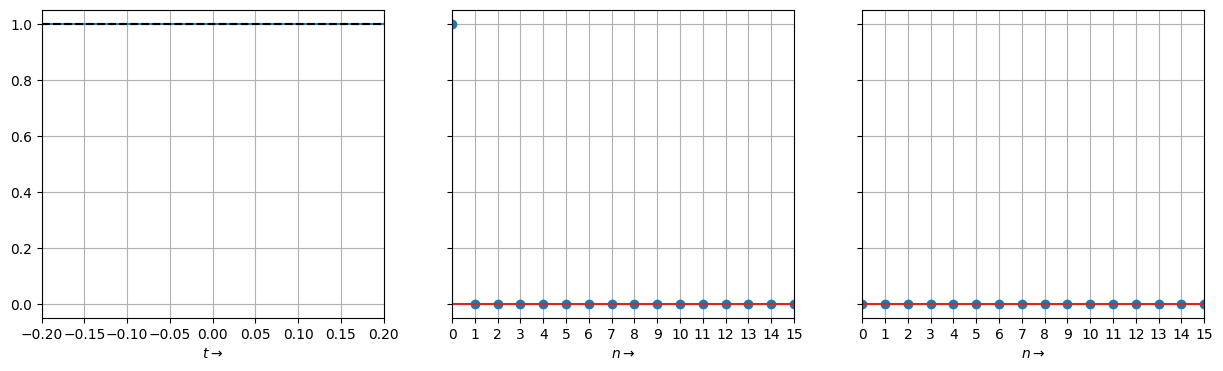

In [3]:
_, _ = plot_time_domain_and_fourier_series('const')

## Cosinus

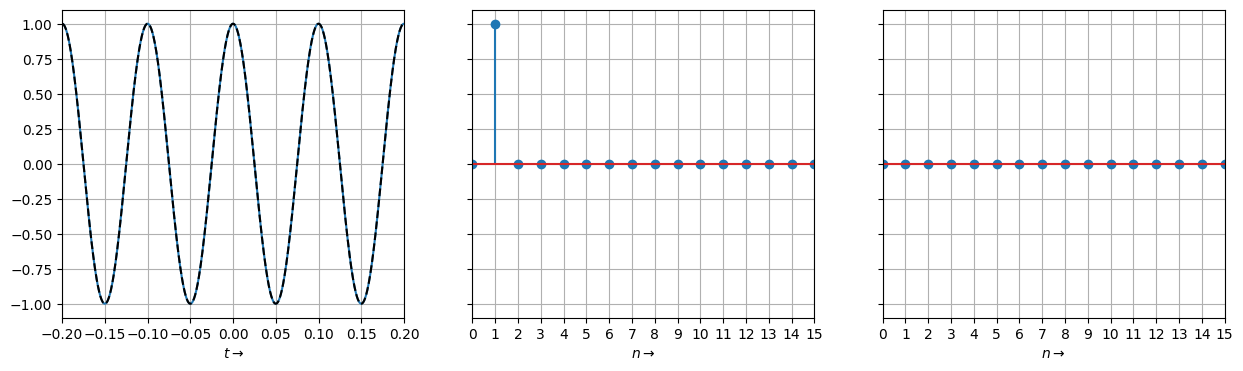

In [4]:
_, _ = plot_time_domain_and_fourier_series('cos', phase=0)

## Sinus

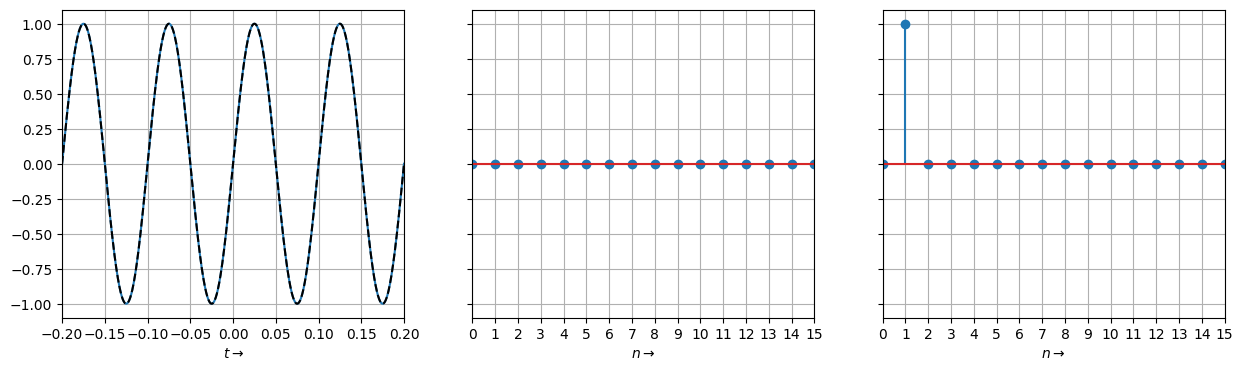

In [5]:
_, _ = plot_time_domain_and_fourier_series('sin', phase=0)

## Rechteck

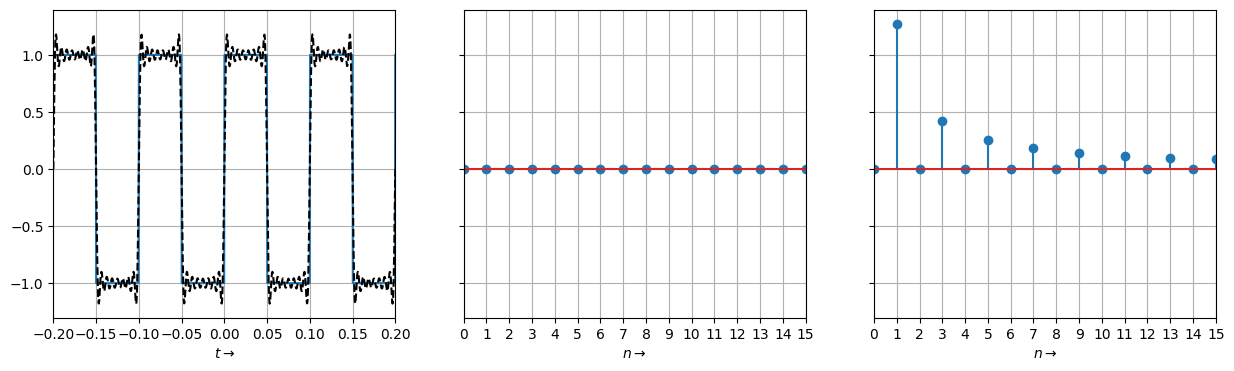

In [6]:
_, _ = plot_time_domain_and_fourier_series('rect')

## Dreieck

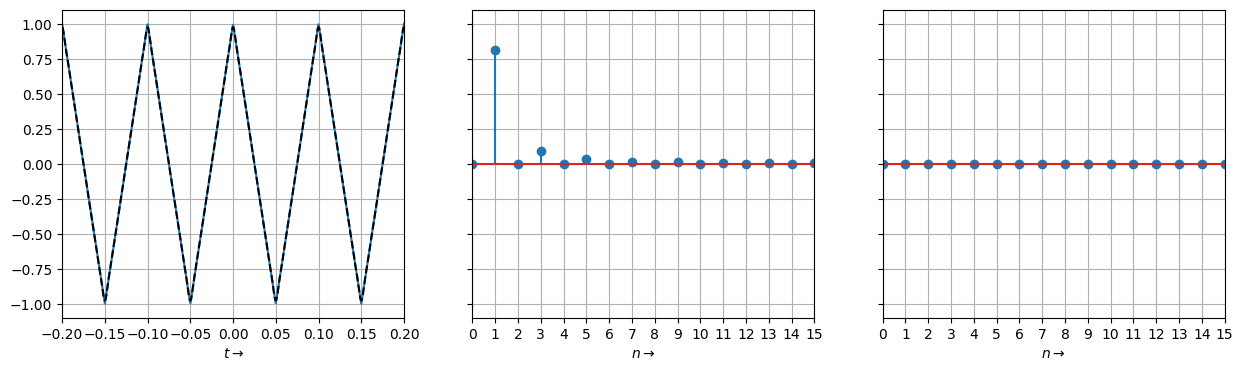

In [7]:
_, _ = plot_time_domain_and_fourier_series('tri', phase=0)

## Sägezahn

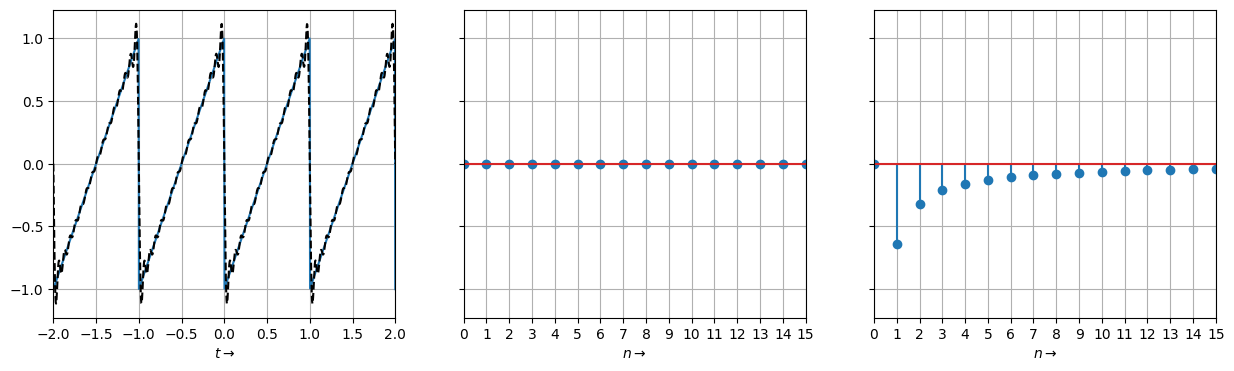

In [8]:
_, _ = plot_time_domain_and_fourier_series('saw', A=1, T=1, phase=0)